In [1]:
!pip install praw

In [2]:
import praw

# Setting up the Reddit client
reddit = praw.Reddit(client_id='', 
                     client_secret='', 
                     user_agent='comments-oracle')





In [3]:
!pip install langchain
!pip install openai

In [4]:
func_call ={
    "name": "sentiment_analysis",
    "description": "Analyses a Reddit post and returns who is at fault.",
    "parameters": {
        "type": "object",
        "properties": {
            "fault": {
                "type": "string",
                "description": "Based on the comments given of a user, who does the user think is at fault?",
                "enum": ["Snowboarder", "Skier", "Both", "Not sure", "N/A"]
            },
            "fault_range": {
                "type": "integer",
                "description": "If 1 is the snowboarder is fully at fault and 10 is the skier is fully at fault, in what range does the user think who is at fault? -1 if N/A",
            },
        },
        "required": ["fault", "fault_range"]
    }
}


In [5]:
comments_prompt = "You will be given a number of comments of a user on a reddit post showing a movie in which a snowboarder and a skier collide. Based on the comments given you need to anaylse who is at fault. You will be given a number of comments of a user on a reddit post showing a movie in which a snowboarder (Me, falling) and a skier (Yellow pants, hitting me from the side) collide. Based on the comments given you need to anaylse who is at fault. {comments}"

In [6]:

from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI."),
    ("human", comments_prompt),
])
model = ChatOpenAI(
    api_key="", model='gpt-3.5-turbo-1106')
report_chain = prompt | model.bind(function_call={"name": "sentiment_analysis"}, functions=[
                            func_call]) | JsonOutputFunctionsParser()

c:\Users\woute\Documents\projects\meta_reddit\.conda\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


ValidationError: 1 validation error for ChatOpenAI
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

In [ ]:
# Gathering all comments from crossposts
reddit_posts = {
    "snowboarding": "1997fpe",
    "skiing": "199wxik",
    "skiingcirclejerk": "19a9evv",
    "forzamotorsport": "1999rsq",
}

In [ ]:
post_name = "forzamotorsport"

In [ ]:

# Fetching the post
post = reddit.submission(id=reddit_posts[post_name])

# Expanding all comments (if there are more replies)
post.comments.replace_more(limit=None)

# Gathering all comments
comments = []
for comment in post.comments.list():
    comments.append(comment)





In [ ]:
import itertools
filtered_comments = [comment for comment in comments if comment.author and comment.author.name]
# First, sort the comments by the author's name
sorted_comments = sorted(filtered_comments, key=lambda x: x.author.name)
# Group the comments by author
comments_grouped = itertools.groupby(sorted_comments, key=lambda x: x.author.name)

# Create an array of comments grouped by the author
comments_by_author = []
for author, group in comments_grouped:
    comments_by_author.append([comment.body for comment in group])



In [ ]:
verdicts = []
for comments in comments_by_author:
    print(comments)
    result = report_chain.invoke({"comments": comments})
    print(result)
    verdicts.append(result)

["I gotta put it on the snowboard. He was initially above the guy on skis and therefore needed to be more aware of where the skirt was. That being said the skier should've also been more aware, the boarder should've been visible in peripheral vision at some point before contact"]
{'fault': 'Snowboarder', 'fault_range': 6}
['Think boarder passed yellow pants for a second or two until he changed lines to get ahead of white pants and took a more direct line down the mountain but needed to cut across the run to slow his speed. Shadows appear to show that as there is a shadow far to the right of standstill white pants. Boarder should have took a quick look to ensure this did not happen but you should never cut across a whole run without looking up.   \n\n\nBoth did not follow proper mountain etiquette thus this incident occurred.']
{'fault': 'Both', 'fault_range': 5}
['Car with the yellow pants turned into POV, I think car with yellow pants is at foult', 'Racing incident']
{'fault': 'Skier'

In [ ]:
verdicts

[{'fault': 'Skier', 'fault_range': 7},
 {'fault': 'N/A', 'fault_range': -1},
 {'fault': 'Snowboarder', 'fault_range': 8},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Skier', 'fault_range': 8},
 {'fault': 'Snowboarder', 'fault_range': 10},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Skier', 'fault_range': 7},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Skier', 'fault_range': 6},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Skier', 'fault_range': 7},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Snowboarder', 'fault_range': 9},
 {'fault': 'Snowboarder', 'fault_range': 7},
 {'fault': 'N/A', 'fault_range': -1},
 {'fault': 'N/A', 'fault_range': -1},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Skier', 'fault_ra

In [ ]:
# save the verdicts in a file
import json
with open(f'{post_name}-verdicts.json', 'w') as f:
    json.dump(verdicts, f)

In [ ]:
!pip install matplotlib

In [ ]:
post_name = 'snowboarding'

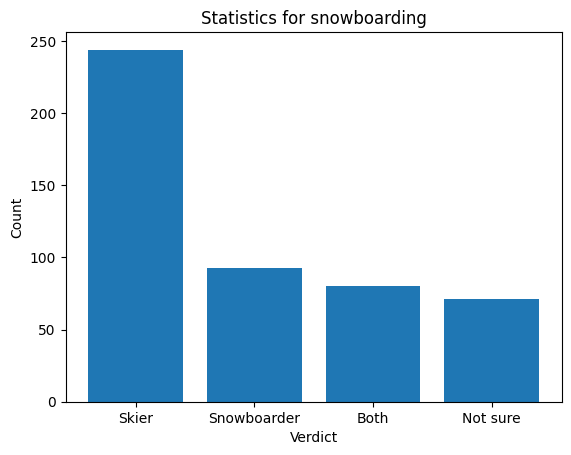

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import json
# Load the verdicts from the file
with open(f'{post_name}-verdicts.json', 'r') as f:
    verdicts = json.load(f)

# Count the number of each verdict for the 'fault' key
verdict_counts = {}
for verdict in verdicts:
    fault = verdict['fault']  # Get the value associated with the 'fault' key
    if fault in verdict_counts:
        verdict_counts[fault] += 1
    else:
        verdict_counts[fault] = 1

# Remove the 'N/A' verdict
del verdict_counts['N/A']

# Sort the verdict counts by the number of times they appear
verdict_counts = dict(sorted(verdict_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the verdict counts
plt.bar(verdict_counts.keys(), verdict_counts.values())
plt.xlabel('Verdict')
plt.ylabel('Count')
plt.title(f'Statistics for {post_name}')
plt.show()

# Save the plot
plt.savefig(f'{post_name}-verdicts.png')


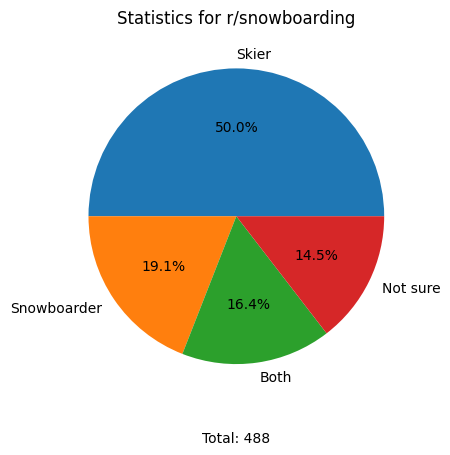

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import json

# Load the verdicts from the file
with open(f'{post_name}-verdicts.json', 'r') as f:
    verdicts = json.load(f)

# Count the number of each verdict for the 'fault' key
verdict_counts = {"Skier": 0, "Snowboarder": 0,
                  "Both": 0, "Not sure": 0, "N/A": 0}
for verdict in verdicts:
    fault = verdict['fault']  # Get the value associated with the 'fault' key
    if fault in verdict_counts:
        verdict_counts[fault] += 1
    else:
        verdict_counts[fault] = 1

# Remove the 'N/A' verdict
del verdict_counts['N/A']

# Create a list of labels and corresponding counts and use the order, Skier, Snowboarder, Both, Not sure
labels = ['Skier', 'Snowboarder', 'Both', 'Not sure']
counts = [verdict_counts[label] for label in labels]

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title(f'Statistics for r/{post_name}')


# add the total count
total_count = sum(counts)
plt.text(0, -1.5, f'Total: {total_count}',
         horizontalalignment='center', verticalalignment='center')

# Display the pie chart
plt.show()

# Save the pie chart
plt.savefig(f'{post_name}-verdicts.png')

In [ ]:
verdicts

[{'fault': 'Skier', 'fault_range': 7},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Skier', 'fault_range': 5},
 {'fault': 'Skier', 'fault_range': 7},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Skier', 'fault_range': 10},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Snowboarder', 'fault_range': 3},
 {'fault': 'Skier', 'fault_range': 10},
 {'fault': 'Not sure', 'fault_range': -1},
 {'fault': 'Skier', 'fault_range': 8},
 {'fault': 'Snowboarder', 'fault_range': 8},
 {'fault': 'Skier', 'fault_range': 7},
 {'fault': 'Snowboarder', 'fault_range': 10},
 {'fault': 'Skier', 'fault_range': 10},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Snowboarder', 'fault_range': 5},
 {'fault': 'Both', 'fault_range': 5},
 {'fault': 'Skier', 'fault_range': 10},
 {'fault': 'Skier', 'fault_range': 10},
 {'fault': 'N/A', 'fault_range': -1},
 {'fault': 'Skier'},
 {'fault': 'Snowboarder', 'fault_range': 7},
 {'fault': 'Skier', 'fault_range': 8},
